# 9-1. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

## 성취 목표
- 모델 설계, 손실함수 정의와 기울기 계산을 구현

## 1. 데이터 가져오기

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

In [2]:
# 데이터 가져오기
diabetes_loaded = load_diabetes()

In [3]:
X = diabetes_loaded.data
y = diabetes_loaded.target

In [4]:
# ndarray -> DataFrame
df_X = pd.DataFrame(data=X, columns=diabetes_loaded.feature_names)
display(df_X.head())
print(df_X.shape)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


(442, 10)


In [5]:
df_y = pd.DataFrame(data=y, columns=["diabetes"])
display(df_y.head())
print(df_y.shape)

,diabetes
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


(442, 1)


## 2. 모델에 입력할 데이터 X 준비하기

In [6]:
type(X)

numpy.ndarray

## 3. 모델에 예측할 데이터 y 준비하기

In [7]:
type(y)

numpy.ndarray

## 4. train 데이터와 test 데이터로 분리하기

In [8]:
from sklearn.model_selection import train_test_split

# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

## 5. 모델 준비하기

In [9]:
# 임의의 W, b 설정
W = np.random.rand(10)
b = np.random.rand()

W,b

(array([0.82485286, 0.25888767, 0.47402085, 0.14300859, 0.18402438,
        0.80414213, 0.90748381, 0.90991309, 0.43419212, 0.05975782]),
 0.9487334921968927)

In [10]:
# 모델 함수 생성
def model(X, W, b):
    predictions = 0      # 변수 선언 & 초기화
    for i in range(10):     # feature는 10개
        predictions += X[:, i] * W[i]        # 한 feature의 데이터들과 가중치 곱
    predictions += b
    return predictions

## 6. 손실함수 loss 정의하기

In [11]:
# MSE 함수 정의
def MSE(y_true, y_pred):
#     error = (y_true - y_pred)
#     squared = error **2
#     mean_ = np.mean(squared)
    mse = np.mean((y_true-y_pred)**2)
    return mse

In [12]:
# loss 함수 정의
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

## 7. 기울기를 구하는 gradient 함수 구현하기

In [13]:
# gradiendt 정의
def gradient(X, W, b, y):
    # 데이터 갯수
    N = len(y)
    
    # y_pred
    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred -y)     #  W에 대한 해석적 미분, T하는 이유? 각 feature에 대한 항등의 곱이기 때문, 행렬에서 곱해야 하는 항 생각
    
    db = np.mean(2 * (y_pred - y))     # b에 대한 해석적 미분
    
    return dW, db
    

## 8. 하이퍼 파라미터인 학습률 설정하기

In [14]:
# 학습률 설정, 현재 W, b에서 다음 W, b를 설정할 때 얼만큼씩 조정할지 설정
LEARNING_RATE = 0.0001

## 9. 모델 학습하기

In [15]:
losses = []

for i in range(1, 1000):
    dW, db = gradient(X_train, W, b, y_train)    # rgradient 구하기
    W -= LEARNING_RATE * dW           # 다음 W로 조정
    b -= LEARNING_RATE * db           # 다음 b로 조정
    L = loss(X_train, W, b, y_train)   # loss 구하기
    losses.append(L)                   
    
    # 학습 경과 출력
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))


Iteration 100 : Loss 27897.0745
Iteration 200 : Loss 27031.5365
Iteration 300 : Loss 26199.9133
Iteration 400 : Loss 25400.8749
Iteration 500 : Loss 24633.1434
Iteration 600 : Loss 23895.4913
Iteration 700 : Loss 23186.7388
Iteration 800 : Loss 22505.7528
Iteration 900 : Loss 21851.4444


### LEARNING_RATE 조정

In [16]:
# LEARNING_RATE 조정
LEARNING_RATE = 0.001

losses = []

for i in range(1, 1000):
    dW, db = gradient(X_train, W, b, y_train)    # rgradient 구하기
    W -= LEARNING_RATE * dW           # 다음 W로 조정
    b -= LEARNING_RATE * db           # 다음 b로 조정
    L = loss(X_train, W, b, y_train)   # loss 구하기
    losses.append(L)                   
    
    # 학습 경과 출력
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))


Iteration 100 : Loss 16143.3547
Iteration 200 : Loss 12733.4945
Iteration 300 : Loss 10446.4521
Iteration 400 : Loss 8911.7591
Iteration 500 : Loss 7881.1837
Iteration 600 : Loss 7188.3986
Iteration 700 : Loss 6721.9564
Iteration 800 : Loss 6407.1818
Iteration 900 : Loss 6194.0389


In [17]:
# LEARNING_RATE 조정
LEARNING_RATE = 0.1

losses = []

for i in range(1, 1000):
    dW, db = gradient(X_train, W, b, y_train)    # rgradient 구하기
    W -= LEARNING_RATE * dW           # 다음 W로 조정
    b -= LEARNING_RATE * db           # 다음 b로 조정
    L = loss(X_train, W, b, y_train)   # loss 구하기
    losses.append(L)                   
    
    # 학습 경과 출력
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))


Iteration 100 : Loss 5185.8709
Iteration 200 : Loss 4755.1989
Iteration 300 : Loss 4432.6096
Iteration 400 : Loss 4187.4226
Iteration 500 : Loss 3998.0429
Iteration 600 : Loss 3849.2337
Iteration 700 : Loss 3730.2112
Iteration 800 : Loss 3633.3141
Iteration 900 : Loss 3553.0729


In [18]:
# LEARNING_RATE 조정
LEARNING_RATE = 0.5

losses = []

for i in range(1, 1000):
    dW, db = gradient(X_train, W, b, y_train)    # rgradient 구하기
    W -= LEARNING_RATE * dW           # 다음 W로 조정
    b -= LEARNING_RATE * db           # 다음 b로 조정
    L = loss(X_train, W, b, y_train)   # loss 구하기
    losses.append(L)                   
    
    # 학습 경과 출력
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))


Iteration 100 : Loss 3262.2152
Iteration 200 : Loss 3136.6834
Iteration 300 : Loss 3059.0144
Iteration 400 : Loss 3009.2664
Iteration 500 : Loss 2976.9061
Iteration 600 : Loss 2955.6354
Iteration 700 : Loss 2941.5220
Iteration 800 : Loss 2932.0676
Iteration 900 : Loss 2925.6697


In [19]:
# 학습 횟수 늘림 1000 -> 5000
LEARNING_RATE = 0.5

losses = []

for i in range(1, 5000):
    dW, db = gradient(X_train, W, b, y_train)    # rgradient 구하기
    W -= LEARNING_RATE * dW           # 다음 W로 조정
    b -= LEARNING_RATE * db           # 다음 b로 조정
    L = loss(X_train, W, b, y_train)   # loss 구하기
    losses.append(L)                   
    
    # 학습 경과 출력
    if i % 500 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))


Iteration 500 : Loss 2912.7296
Iteration 1000 : Loss 2910.7796
Iteration 1500 : Loss 2910.0279
Iteration 2000 : Loss 2909.5559
Iteration 2500 : Loss 2909.1654
Iteration 3000 : Loss 2908.8040
Iteration 3500 : Loss 2908.4561
Iteration 4000 : Loss 2908.1166
Iteration 4500 : Loss 2907.7837


## 10. test 데이터에 대한 성능 확인하기

In [20]:
# 모델 학습으로 구한 W, b 확인하기
W, b

(array([ -62.36183012, -223.94043646,  535.78065892,  257.07083999,
        -105.38787426, -104.93302967, -168.72662608,  152.42513256,
         561.87800633,   37.53579795]),
 152.1946461908102)

In [21]:
# 학습된 모델로 테스트 데이터데 대해 예측
prediction = model(X_test, W, b)

# 평가
mse = MSE(y_test, prediction)
mse

2885.1571635885043

## 11. 정답 데이터와 예측한 데이터 시각화하기

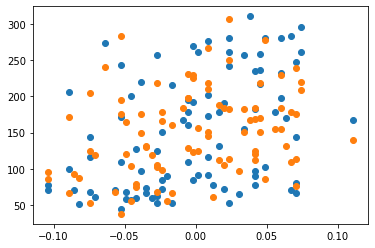

In [22]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

# 회고

- `LEARNING_RATE`와 `학습횟수`를 잘 설정해야 컴퓨팅 자원을 적게 사용하면서, 최적의 모델 파라미터를 찾을 수 있을 것 같다.
- 시간이 부족해, EDA를 충분히 해보지 못했고, 그에 따른 Feature Engineering을 시도해보지 못했다. -> 차후, EDA와 Feature Engineering를 추가해야 겠다.